In [15]:
#!/usr/bin/env python3

#SBATCH --time=00:30:00
#SBATCH --partition=broadwl
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=32G
#SBATCH --mail-type=all
#SBATCH --mail-user=letitiayhho@uchicago.edu
#SBATCH --output=logs/plot-aux-psd_%j.log

from mne_bids import BIDSPath, write_raw_bids, get_anonymization_daysback
import mne
import os.path
from util.io.iter_raw_paths import iter_raw_paths

def load_raw(sub, raw_dir, fpath):
    fpath = raw_dir + fpath
    print(fpath)
    raw = mne.io.read_raw_brainvision(fpath)
    raw.load_data()
    if int(sub) < 29:
        aux_names = ['Left', 'Right']
        raw.set_channel_types({'Left': 'eeg', 'Right': 'eeg'})
        raw.pick_channels(aux_names)
    elif 29 <= int(sub) < 41:
        aux_names = ['Audio', 'Audio2']
        raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})
        raw.pick_channels(aux_names)
    elif int(sub) >= 41:
        aux_names = ['left', 'right']
        raw.set_channel_types({'left': 'eeg', 'right': 'eeg'})
        raw.pick_channels(aux_names)
    return raw, aux_names

def get_events(raw):
    events, event_ids = mne.events_from_annotations(raw)
    return(events)

def epoch(raw, events):
    epochs = mne.Epochs(raw, events, tmin = -0.4, tmax = .4, baseline = (-0.4, 0))
    return(epochs)

def plot_aux(tag, sub, FIGS_DIR, epochs, aux_names):
    aux = aux_names[0]
    print(f"---------- Tag {tag}: Audio: {aux} ----------")
    plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 400) # thought this was right
    figname = f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{aux}.png'
    print(f"saving to {figname}")
    plt.savefig(figname)
    
    aux = aux_names[1]
    print(f"---------- Tag {tag}: Audio: {aux} ----------")
    plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 300) # thought this was left
    figname = f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{aux}.png'
    print(f"saving to {figname}")
    plt.savefig(figname)


# Constants
RAW_DIR = '../data/raw/'
FIGS_DIR = '../figs'

for (fpath, sub, task, run) in iter_raw_paths(RAW_DIR):
    raw, aux_names = load_raw(sub, RAW_DIR, fpath)
#     events = get_events(raw)
#     epochs = epoch(raw, events)
#     plot_aux('12', sub, FIGS_DIR, epochs, aux_names)
#     plot_aux('31', sub, FIGS_DIR, epochs, aux_names)


sub-24.vhdr
../data/raw/sub-24.vhdr
Extracting parameters from ../data/raw/sub-24.vhdr...
Setting channel info structure...
Reading 0 ... 17303499  =      0.000 ...  3460.700 secs...
sub-40.vhdr
../data/raw/sub-40.vhdr
Extracting parameters from ../data/raw/sub-40.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 16163699  =      0.000 ...  3232.740 secs...


/tmp/ipykernel_11576/886220140.py:33: RuntimeWarning: The unit for channel(s) Audio, Audio2 has changed from NA to V.
  raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})


sub-1.vhdr
../data/raw/sub-1.vhdr
Extracting parameters from ../data/raw/sub-1.vhdr...
Setting channel info structure...
Reading 0 ... 3916749  =      0.000 ...   783.350 secs...
sub-20.vhdr
../data/raw/sub-20.vhdr
Extracting parameters from ../data/raw/sub-20.vhdr...
Setting channel info structure...
Reading 0 ... 18197749  =      0.000 ...  3639.550 secs...
sub-41.vhdr
../data/raw/sub-41.vhdr
Extracting parameters from ../data/raw/sub-41.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'right', 'left']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'right', 'left']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 16341299  =      0.000 ...  3268.260 secs...


/tmp/ipykernel_11576/886220140.py:37: RuntimeWarning: The unit for channel(s) left, right has changed from NA to V.
  raw.set_channel_types({'left': 'eeg', 'right': 'eeg'})


sub-30.vhdr
../data/raw/sub-30.vhdr
Extracting parameters from ../data/raw/sub-30.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 20922699  =      0.000 ...  4184.540 secs...


/tmp/ipykernel_11576/886220140.py:33: RuntimeWarning: The unit for channel(s) Audio, Audio2 has changed from NA to V.
  raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})


sub-6.vhdr
../data/raw/sub-6.vhdr
Extracting parameters from ../data/raw/sub-6.vhdr...
Setting channel info structure...
Reading 0 ... 20014749  =      0.000 ...  4002.950 secs...
sub-42.vhdr
../data/raw/sub-42.vhdr
Extracting parameters from ../data/raw/sub-42.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'right', 'left']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'right', 'left']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 17261399  =      0.000 ...  3452.280 secs...


/tmp/ipykernel_11576/886220140.py:37: RuntimeWarning: The unit for channel(s) left, right has changed from NA to V.
  raw.set_channel_types({'left': 'eeg', 'right': 'eeg'})


sub-38.vhdr
../data/raw/sub-38.vhdr
Extracting parameters from ../data/raw/sub-38.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 18886199  =      0.000 ...  3777.240 secs...


/tmp/ipykernel_11576/886220140.py:33: RuntimeWarning: The unit for channel(s) Audio, Audio2 has changed from NA to V.
  raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})


sub-33.vhdr
../data/raw/sub-33.vhdr
Extracting parameters from ../data/raw/sub-33.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 16115399  =      0.000 ...  3223.080 secs...


/tmp/ipykernel_11576/886220140.py:33: RuntimeWarning: The unit for channel(s) Audio, Audio2 has changed from NA to V.
  raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})


sub-35.vhdr
../data/raw/sub-35.vhdr
Extracting parameters from ../data/raw/sub-35.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 19784399  =      0.000 ...  3956.880 secs...


/tmp/ipykernel_11576/886220140.py:33: RuntimeWarning: The unit for channel(s) Audio, Audio2 has changed from NA to V.
  raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})


sub-8.vhdr
../data/raw/sub-8.vhdr
Extracting parameters from ../data/raw/sub-8.vhdr...
Setting channel info structure...
Reading 0 ... 16010499  =      0.000 ...  3202.100 secs...
sub-43.vhdr
../data/raw/sub-43.vhdr
Extracting parameters from ../data/raw/sub-43.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'right', 'left']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'right', 'left']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 19007399  =      0.000 ...  3801.480 secs...


/tmp/ipykernel_11576/886220140.py:37: RuntimeWarning: The unit for channel(s) left, right has changed from NA to V.
  raw.set_channel_types({'left': 'eeg', 'right': 'eeg'})


sub-25.vhdr
../data/raw/sub-25.vhdr
Extracting parameters from ../data/raw/sub-25.vhdr...
Setting channel info structure...
Reading 0 ... 4776749  =      0.000 ...   955.350 secs...
sub-9.vhdr
../data/raw/sub-9.vhdr
Extracting parameters from ../data/raw/sub-9.vhdr...
Setting channel info structure...
Reading 0 ... 13535999  =      0.000 ...  2707.200 secs...
sub-11.vhdr
../data/raw/sub-11.vhdr
Extracting parameters from ../data/raw/sub-11.vhdr...
Setting channel info structure...
Reading 0 ... 15845999  =      0.000 ...  3169.200 secs...
sub-14.vhdr
../data/raw/sub-14.vhdr
Extracting parameters from ../data/raw/sub-14.vhdr...
Setting channel info structure...
Reading 0 ... 20929249  =      0.000 ...  4185.850 secs...
sub-4.vhdr
../data/raw/sub-4.vhdr
Extracting parameters from ../data/raw/sub-4.vhdr...
Setting channel info structure...
Reading 0 ... 19547249  =      0.000 ...  3909.450 secs...
sub-5.vhdr
../data/raw/sub-5.vhdr
Extracting parameters from ../data/raw/sub-5.vhdr...
Setti

/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(fpath)
/tmp/ipykernel_11576/886220140.py:25: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(fpath)


Reading 0 ... 19300199  =      0.000 ...  3860.040 secs...


ValueError: This channel name (Left) doesn't exist in info.

In [16]:
# fpath_full = RAW_DIR + fpath
raw = mne.io.read_raw_brainvision('../data/raw/sub-29.vhdr')
raw.info['ch_names']
# fpath

Extracting parameters from ../data/raw/sub-29.vhdr...
Setting channel info structure...


/tmp/ipykernel_11576/2769737895.py:2: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Audio', 'Audio2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision('../data/raw/sub-29.vhdr')
/tmp/ipykernel_11576/2769737895.py:2: RuntimeWarning: Not setting positions of 4 misc channels found in montage:
['leog', 'reog', 'Audio', 'Audio2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision('../data/raw/sub-29.vhdr')


['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'leog',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CPz',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'reog',
 'AF4',
 'F2',
 'FCz',
 'Audio',
 'Audio2']

In [1]:
from mne_bids import BIDSPath, write_raw_bids, get_anonymization_daysback
import random
import pandas as pd
import numpy as np
import itertools
import mne
import os
import sys
import re
from util.io.iter_raw_paths import iter_raw_paths

In [2]:
RAW_DIR = '../data/raw/'
BIDS_DIR = '../data/bids/'
MAPS_DIR = '../data/captrak/'
FIGS_DIR = '../figs'

---------- Tag 12: Audio: Left ----------
Using data from preloaded Raw for 204 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_350/304686762.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 400) # thought this was right


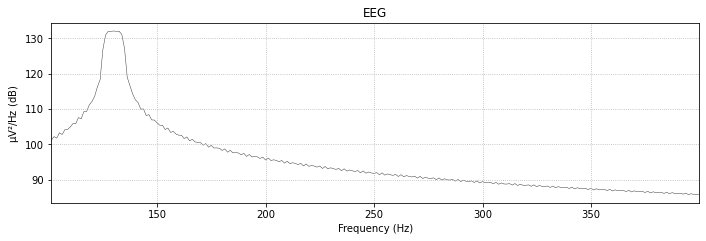

saving to ../figs/sub-24_tag-12_aux-Left.png
---------- Tag 12: Audio: Right ----------
Using data from preloaded Raw for 204 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_350/304686762.py:34: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 300) # thought this was left


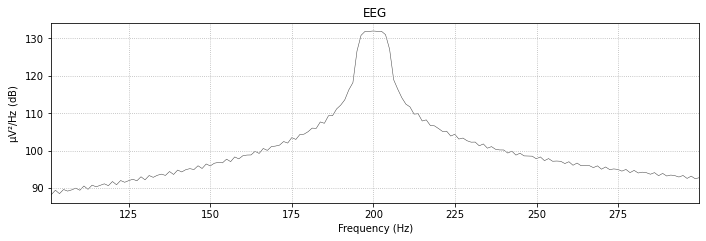

saving to ../figs/sub-24_tag-12_aux-Right.png
---------- Tag 31: Audio: Left ----------
Using data from preloaded Raw for 216 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_350/304686762.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 400) # thought this was right


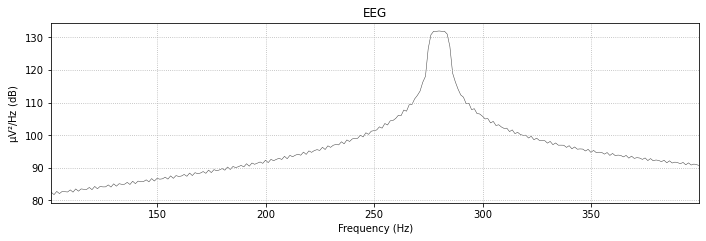

saving to ../figs/sub-24_tag-31_aux-Left.png
---------- Tag 31: Audio: Right ----------
Using data from preloaded Raw for 216 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_350/304686762.py:34: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 300) # thought this was left


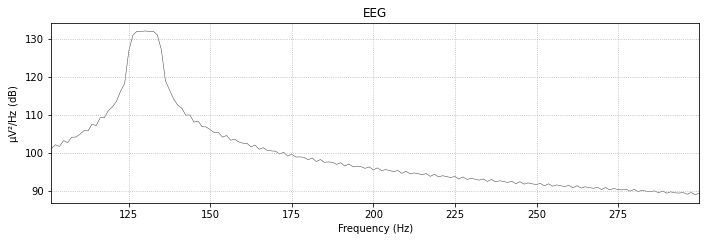

saving to ../figs/sub-24_tag-31_aux-Right.png


In [18]:
for (fpath, sub, task, run) in iter_raw_paths(RAW_DIR):
    raw, aux_names = load_raw(sub, RAW_DIR, fpath)
    events = get_events(raw)
    epochs = epoch(raw, events)
    plot_aux('12', sub, FIGS_DIR, epochs, aux_names)
    plot_aux('31', sub, FIGS_DIR, epochs, aux_names)

In [16]:
def load_raw(sub, raw_dir, fpath):
    fpath = RAW_DIR + fpath
    print(fpath)
    raw = mne.io.read_raw_brainvision(fpath)
    raw.load_data()
    if int(sub) < 29:
        aux_names = ['Left', 'Right']
        raw.set_channel_types({'Left': 'eeg', 'Right': 'eeg'})
        raw.pick_channels(aux_names)
    else:
        aux_names = ['Audio', 'Audio2']
        raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})
        raw.pick_channels(aux_names)
    return raw, aux_names

def get_events(raw):
    events, event_ids = mne.events_from_annotations(raw)
    return(events)

def epoch(raw, events):
    epochs = mne.Epochs(raw, events, tmin = -0.4, tmax = .4, baseline = (-0.4, 0))
    return(epochs)

def plot_aux(tag, sub, FIGS_DIR, epochs, aux_names):
    aux = aux_names[0]
    print(f"---------- Tag {tag}: Audio: {aux} ----------")
    plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 400) # thought this was right
    figname = f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{aux}.png'
    print(f"saving to {figname}")
    plt.savefig(figname)
    
    aux = aux_names[1]
    print(f"---------- Tag {tag}: Audio: {aux} ----------")
    plt = epochs[tag].plot_psd(picks = aux, fmin = 100, fmax = 300) # thought this was left
    figname = f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{aux}.png'
    print(f"saving to {figname}")
    plt.savefig(figname)

In [10]:
# load data with MNE function for your file format
# fpath = RAW_DIR + fpath
print(fpath)
raw = mne.io.read_raw_brainvision(fpath)
raw.load_data()
if int(sub) < 29:
    aux_names = ['Left', 'Right']
    raw.set_channel_types({'Left': 'eeg', 'Right': 'eeg'})
    raw.pick_channels(aux_names)
else:
    aux_names = ['Audio', 'Audio2']
    raw.set_channel_types({'Audio': 'eeg', 'Audio2': 'eeg'})
    raw.pick_channels(aux_names)

../data/raw/sub-24.vhdr
Extracting parameters from ../data/raw/sub-24.vhdr...
Setting channel info structure...
Reading 0 ... 17303499  =      0.000 ...  3460.700 secs...


In [12]:
# Extract events from raw file
print("Set annotations")
events = get_events(raw)
# events, event_ids = mne.events_from_annotations(raw)

Set annotations
Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33']


In [ ]:
# Epoch data
epochs = mne.Epochs(raw, events, tmin = -0.4, tmax = .4, baseline = (-0.4, 0))

---------- Tag 12: Audio ----------
Using data from preloaded Raw for 206 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_30743/1950416004.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['12'].plot_psd(picks = 'Audio', fmin = 100, fmax = 400) # thought this was right


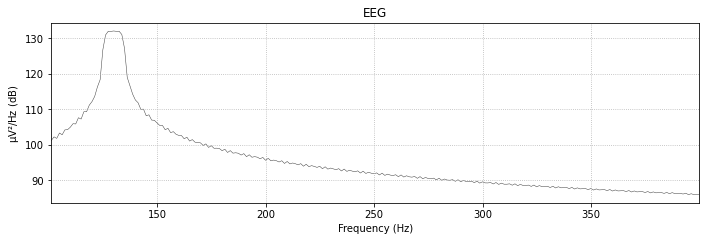

---------- Tag 12: Audio2 ----------
Using data from preloaded Raw for 206 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_30743/1950416004.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['12'].plot_psd(picks = 'Audio2', fmin = 100, fmax = 300) # thought this was left


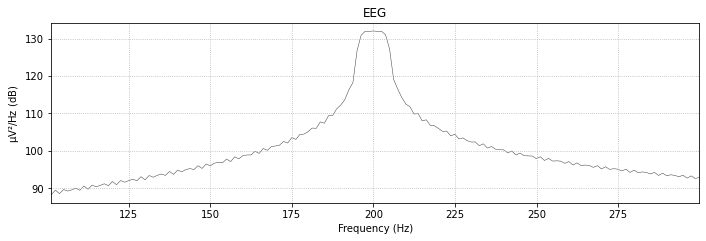

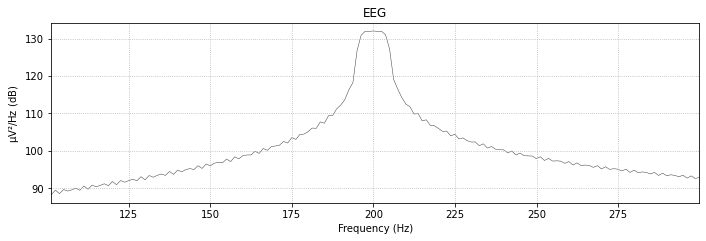

In [52]:
# Event tag indicates left aux is playing tone 3, right aux is playing tone 2
tag = '12'

print(f"---------- Tag {tag}: Audio ----------")
epochs[tag].plot_psd(picks = 'Audio', fmin = 100, fmax = 400) # thought this was right
plt.savefig(f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{1}.png')
print(f"---------- Tag {tag}: Audio2 ----------")
epochs[tag].plot_psd(picks = 'Audio2', fmin = 100, fmax = 300) # thought this was left
plt.savefig(f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{2}.png')

Using data from preloaded Raw for 216 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_30743/1704527122.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['31'].plot_psd(picks = 'Audio', fmin = 100, fmax = 400) # thought this was right


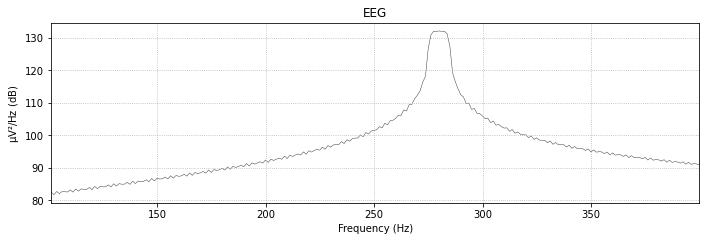

Using data from preloaded Raw for 216 events and 4001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_30743/1704527122.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['31'].plot_psd(picks = 'Audio2', fmin = 100, fmax = 300) # thought this was left


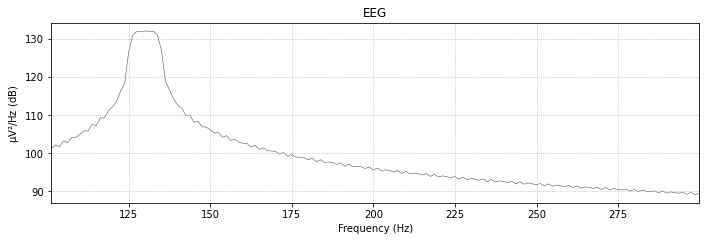

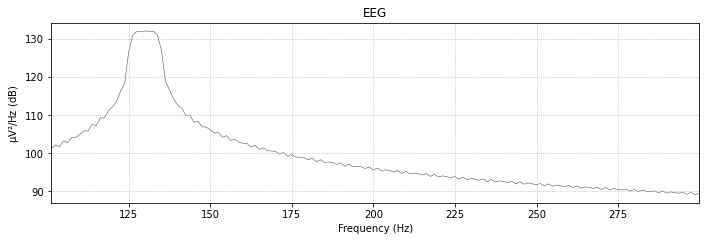

In [50]:
tag = 31

print(f"---------- Tag {tag}: Audio ----------")
epochs[tag].plot_psd(picks = 'Audio', fmin = 100, fmax = 400) # thought this was right
plt.savefig(f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{1}.png')
print(f"---------- Tag {tag}: Audio2 ----------")
epochs[tag].plot_psd(picks = 'Audio2', fmin = 100, fmax = 300) # thought this was left
plt.savefig(f'{FIGS_DIR}/sub-{sub}_tag-{tag}_aux-{2}.png')